In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

The questions we want answered for this capstone project are how extreme are the housing prices in the Bay Area and how fast have they grown compared to the rest of the United States. Again, I'm going to be taking data after the Great Recession which supposedly ended January 2010.

In [2]:
# Upload data set from csv
df = pd.read_csv('Zip_Zhvi_AllHomes.csv', parse_dates = True)
df = df.fillna(0)
df = df.set_index('RegionName')
full = df.drop(['RegionID', 'SizeRank', 'Metro', 'City'], axis = 1)
full_size = df.drop(['RegionID', 'Metro', 'City'], axis = 1)

full.head(10)

,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,NY,New York,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,...,1094700,1097700,1103400,1119700,1134000,1138100,1134400,1129300,1125200,1125000
60657,IL,Cook,158400.0,159700.0,160700.0,161400.0,161700.0,161400.0,160800.0,159800.0,...,343800,344500,344100,345000,346500,347200,347500,348300,349400,349300
10023,NY,New York,347900.0,349600.0,351100.0,352500.0,353700.0,354800.0,356000.0,357400.0,...,1608800,1603800,1597900,1593900,1586700,1565700,1542400,1532100,1527700,1518600
75070,TX,Collin,235100.0,236300.0,236100.0,234800.0,232700.0,230000.0,226700.0,222700.0,...,307200,309100,311700,313400,314300,315500,317100,318600,320100,320900
77494,TX,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,IL,Cook,192500.0,194500.0,196100.0,197000.0,197200.0,196800.0,195800.0,194400.0,...,421100,420500,420500,422800,425200,425100,424800,426500,429000,430000
79936,TX,El Paso,77200.0,77200.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,...,119400,119600,119900,120500,120700,120600,120400,120500,121000,121500
77084,TX,Harris,94700.0,95000.0,95200.0,95500.0,95700.0,95900.0,95900.0,95900.0,...,157900,158600,159900,161600,162500,162500,162600,162700,163100,163800
10002,NY,New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,992500,997300,1003800,1008700,1003700,989300,977300,975600,980700,987300


In [3]:
full.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,...,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04,1.481900e+04
mean,1.060416e+05,1.061465e+05,1.062499e+05,1.063501e+05,1.064604e+05,1.065874e+05,1.067524e+05,1.069447e+05,1.072398e+05,1.076217e+05,...,2.594220e+05,2.608792e+05,2.624135e+05,2.639129e+05,2.653212e+05,2.667899e+05,2.682148e+05,2.698173e+05,2.718805e+05,2.733657e+05
std,7.582485e+04,7.588861e+04,7.595780e+04,7.603056e+04,7.611914e+04,7.622754e+04,7.637336e+04,7.655100e+04,7.682414e+04,7.717207e+04,...,2.606774e+05,2.624866e+05,2.646061e+05,2.669286e+05,2.690837e+05,2.712706e+05,2.734674e+05,2.756205e+05,2.778401e+05,2.791430e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,6.180000e+04,6.190000e+04,6.210000e+04,6.220000e+04,6.230000e+04,6.250000e+04,6.270000e+04,6.280000e+04,6.310000e+04,6.340000e+04,...,1.265000e+05,1.271500e+05,1.278000e+05,1.283000e+05,1.289000e+05,1.296500e+05,1.302000e+05,1.308000e+05,1.318000e+05,1.323000e+05
50%,9.280000e+04,9.290000e+04,9.290000e+04,9.300000e+04,9.310000e+04,9.320000e+04,9.320000e+04,9.330000e+04,9.350000e+04,9.380000e+04,...,1.859000e+05,1.870000e+05,1.881000e+05,1.891000e+05,1.899000e+05,1.911000e+05,1.919000e+05,1.929000e+05,1.944000e+05,1.954000e+05
75%,1.350000e+05,1.351500e+05,1.351500e+05,1.353000e+05,1.354000e+05,1.357000e+05,1.358000e+05,1.359000e+05,1.361000e+05,1.366000e+05,...,2.967500e+05,2.983000e+05,2.997500e+05,3.017500e+05,3.028000e+05,3.045500e+05,3.060000e+05,3.080000e+05,3.105500e+05,3.126000e+05
max,1.226900e+06,1.228100e+06,1.229400e+06,1.230500e+06,1.231500e+06,1.232200e+06,1.232900e+06,1.233500e+06,1.234600e+06,1.236000e+06,...,6.091300e+06,6.141700e+06,6.185000e+06,6.254900e+06,6.369200e+06,6.507300e+06,6.611300e+06,6.668200e+06,6.697700e+06,6.704800e+06


In [4]:
# Create list of Bay Area counties
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa','San Francisco', 'San Mateo', 'Santa Clara','Solano', 'Sonoma']

In [5]:
# Create data frame of Bay Area zip codes
bay_area = full[(full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA')]

In [6]:
ba = bay_area.loc[:,'2010-01':'2018-04']
ba.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
94109,740700.0,742900.0,737600.0,734100.0,735400.0,734800.0,728000.0,719100.0,714500.0,713500.0,...,1199700,1214400,1234900,1249500,1256500,1262500,1263000,1259700,1255300,1247500
94565,163000.0,162700.0,163700.0,166300.0,170300.0,174600.0,178500.0,180800.0,181800.0,181000.0,...,390800,395200,399300,403400,406600,408700,411300,415700,422500,428400
94501,560000.0,561300.0,561000.0,561800.0,565800.0,568600.0,567300.0,564000.0,559800.0,556800.0,...,930300,937900,948900,962300,974000,984800,995900,1005300,1012300,1012600
94110,729900.0,731900.0,730800.0,734600.0,740200.0,738700.0,733200.0,726800.0,721400.0,717000.0,...,1452100,1454200,1458000,1465200,1469000,1472600,1475400,1483000,1501900,1518300
94558,420800.0,423500.0,419600.0,409200.0,401300.0,399100.0,398000.0,396900.0,393600.0,392300.0,...,634700,637200,641800,644800,645100,645400,648100,654100,661500,664700


In [7]:
ba['2018-04'].describe()

count    2.380000e+02
mean     1.197623e+06
std      7.699408e+05
min      3.614000e+05
25%      7.073500e+05
50%      1.016050e+06
75%      1.389150e+06
max      6.704800e+06
Name: 2018-04, dtype: float64

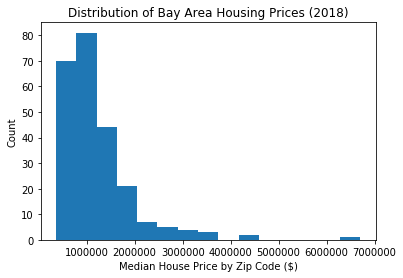

In [8]:
_ = plt.hist(ba['2018-04'], bins = 15)
_ = plt.title('Distribution of Bay Area Housing Prices (2018)')
_ = plt.xlabel('Median House Price by Zip Code ($)')
_ = plt.ylabel('Count')

In [9]:
# Create data frame of non-Bay Area zip codes
united_states = full[~((full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA'))]
us = united_states.loc[:,'2010-01':'2018-04']
us.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,741500.0,739400.0,737600.0,745500.0,760400.0,777000.0,790600.0,794200.0,786500.0,778800.0,...,1094700,1097700,1103400,1119700,1134000,1138100,1134400,1129300,1125200,1125000
60657,307300.0,308600.0,308200.0,306300.0,305400.0,305700.0,304300.0,301800.0,298000.0,293000.0,...,343800,344500,344100,345000,346500,347200,347500,348300,349400,349300
10023,984400.0,983400.0,982300.0,982000.0,985400.0,994300.0,1007300.0,1021300.0,1031800.0,1036900.0,...,1608800,1603800,1597900,1593900,1586700,1565700,1542400,1532100,1527700,1518600
75070,200100.0,199700.0,200300.0,202200.0,203100.0,202700.0,202600.0,202400.0,202000.0,201900.0,...,307200,309100,311700,313400,314300,315500,317100,318600,320100,320900
77494,249200.0,247800.0,248100.0,250800.0,251700.0,251200.0,251100.0,250500.0,250000.0,249900.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900


In [10]:
us['2018-04'].describe()

count    1.458100e+04
mean     2.582794e+05
std      2.353389e+05
min      1.380000e+04
25%      1.315000e+05
50%      1.928000e+05
75%      3.031000e+05
max      4.969400e+06
Name: 2018-04, dtype: float64

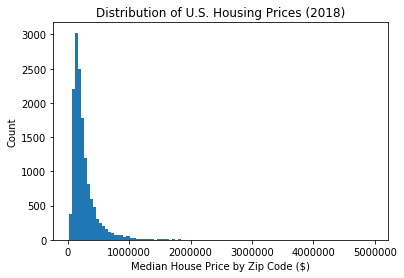

In [11]:
_ = plt.hist(us['2018-04'], bins = 100)
_ = plt.title('Distribution of U.S. Housing Prices (2018)')
_ = plt.xlabel('Median House Price by Zip Code ($)')
_ = plt.ylabel('Count')

# 2018 Bay Area Housing Prices vs. United States
Now that I've separated the data into Bay Area and non-Bay Area zip codes, I want to test the hypothesis that the mean housing price by zip code for the Bay Area and the United States is the same as of April 2018. In other words:
+ $H_0$: $\mu_{ba2018} = \mu_{us2018}$
+ $H_1$: $\mu_{ba2018} > \mu_{us2018}$

The process is to assume and simulate the data under the null hypothesis. I'll perform a z-test since we have the population standard deviation and because the sample sizes are significantly large ($n_{ba}, n_{us} >> 30$), the Central Limit Theorem applies. I'll choose a significance alpha of 0.01 ($\alpha = 0.01$) to test the null hypothesis.

In [12]:
# Calculate the z statistic and one sided p-value
z = (np.mean(ba['2018-04']) - np.mean(us['2018-04']))/np.sqrt((np.var(ba['2018-04'])/len(ba['2018-04']))+((np.var(us['2018-04'])/len(us['2018-04']))))
p_val = stats.norm.sf(z)

print(z, p_val)

18.84679644221277 1.5609225743002473e-79


Here, I got a p-value that is significantly smaller than the $\alpha$ meaning we can reject the null hypothesis and say that the mean housing price in the Bay Area is greater than the mean housing price of the rest of the United States.

# 2010-2018 Bay Area Housing Price Percent Change vs. United States
Here, I want to look at how much housing prices have changed since 2010 and compare the rates of the Bay Area to the rest of the United States. This could show how volitile/rapid a specific area is growing.

In [13]:
# Create new data frames with 2010 and 2018 data
ba_pc = pd.concat([ba['2010-01'], ba['2018-04']], axis = 1)
us_pc = pd.concat([us['2010-01'], us['2018-04']], axis = 1)

# Add percent change column to each new data frame
ba_pc['change'] = (ba['2018-04'] - ba['2010-01'])/ba['2010-01']
us_pc['change'] = (us['2018-04'] - us['2010-01'])/us['2010-01']

In both percent change dataframes, there are a number of zip codes that didn't have data in January 2010 causing the ``change`` to be $inf$. Below is a calculation of how many $inf$ are in each data set. Both are below 4% meaning we can ignore/remove those zip codes without significantly affecting the analysis

In [14]:
# Calculate percentage of data has 'inf' change
n_ba_pc_inf = (ba_pc['change'] == float('inf')).sum()
n_us_pc_inf = (us_pc['change'] == float('inf')).sum()

print(n_ba_pc_inf/len(ba_pc), n_us_pc_inf/len(us_pc))

0.029411764705882353 0.039366298607777246


In [15]:
# Remove data with 'inf' change
ba_pc = ba_pc[ba_pc['change'] != float('inf')]
us_pc = us_pc[us_pc['change'] != float('inf')]

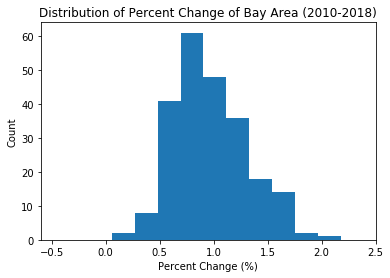

In [16]:
_ = plt.hist(ba_pc['change'])
_ = plt.title('Distribution of Percent Change of Bay Area (2010-2018)')
_ = plt.xlabel('Percent Change (%)')
_ = plt.ylabel('Count')
_ = plt.xlim([-0.6, 2.5])

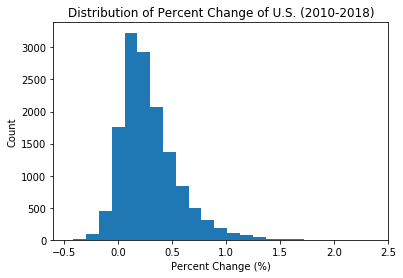

In [17]:
_ = plt.hist(us_pc['change'], bins = 20)
_ = plt.title('Distribution of Percent Change of U.S. (2010-2018)')
_ = plt.xlabel('Percent Change (%)')
_ = plt.ylabel('Count')
_ = plt.xlim([-0.6, 2.5])

Since both samples are sufficiently large, the Central Limit Theorem applies again and we can perform a z-test to test the hypothesis that the mean percent change is the same for the Bay Area and the United States.
+ $H_0$: $\mu_{pc_{ba}} = \mu_{pc_{us}}$
+ $H_1$: $\mu_{pc_{ba}} > \mu_{pc_{us}}$

In [18]:
# Calculate z statistic and p-value of percent change between Bay Area and U.S.
z_pc = (np.mean(ba_pc['change']) - np.mean(us_pc['change']))/np.sqrt((np.var(ba_pc['change'])/len(ba_pc['change']))+((np.var(us_pc['change'])/len(us_pc['change']))))
p_val_pc = stats.norm.sf(z_pc)

print(z_pc, p_val_pc)

30.399680217868458 2.773320687451222e-203


Again with an alpha of 0.01, we can reject the null hypothesis and assume that the mean percent change of housing prices in the Bay Area is greater than that of the entire United States.

# 2018 Bay Area Housing Prices by County

In [19]:
# Count how many zip codes are in each Bay Area county
bay_area.loc[:,['CountyName','2018-04']].groupby('CountyName').count()

,2018-04
CountyName,
Alameda,46
Contra Costa,32
Marin,16
Napa,7
San Francisco,24
San Mateo,25
Santa Clara,52
Solano,11
Sonoma,25


The table above displays the number of zip codes in each county within the Bay Area. As shown, most counties in the Bay Area have less than 30 zip codes and after visual inspection, most counties have median price distributions that are skewed to the right. A t-test will be most useful for comparing mean housing prices between counties since each set of data is small.

For each of the following tests, the null hypothesis is assumed to be that the mean prices are the same.
+ $H_0$: $\mu_{county1} = \mu_{county2}$
+ $H_1$: $\mu_{county1} \neq \mu_{county2}$.

I'll also have an significance level of 0.01 ($\alpha = 0.01$) and hence any p-value below it, we'll reject the null hypothesis that the two counties have similar mean housing prices.

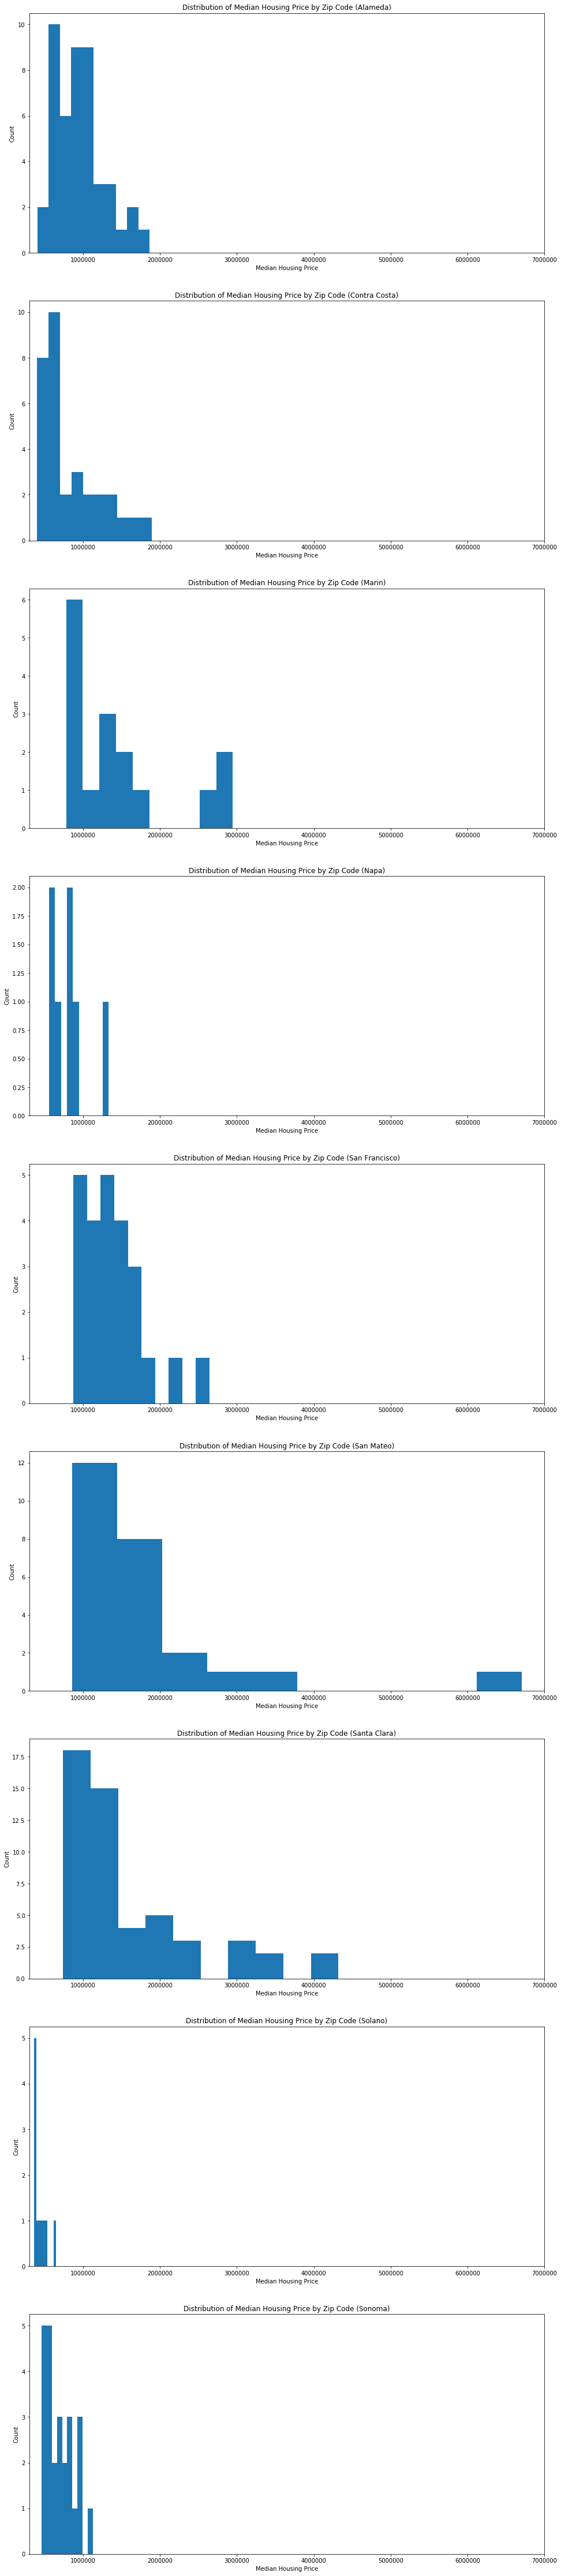

In [32]:
# Plot distribution of median house prices by zip code by Bay Area county
plt.subplots(figsize = (16, 81))
for county in bayarea_counties:
    _ = plt.subplot(9, 1, bayarea_counties.index(county) + 1)
    _ = plt.hist(bay_area[bay_area['CountyName'] == county]['2018-04'])
    _ = plt.title('Distribution of Median Housing Price by Zip Code (' + county + ')')
    _ = plt.xlabel('Median Housing Price')
    _ = plt.ylabel('Count')
    _ = plt.xlim([300000,7000000])

In [21]:
# Initialize empty dictionary to eventually transform into a data frame
ba_county_ttest = {}

In [22]:
# Create for loop to calculate t-statistic and p-value between Bay Area counties
# and their median housing price by zip code
for comb1, comb2 in combinations(bayarea_counties, 2):
    ba_county_ttest[comb1, comb2] = stats.ttest_ind(bay_area[bay_area['CountyName'] == comb1]['2018-04'],
                                                   bay_area[bay_area['CountyName'] == comb2]['2018-04'])

# Transform data into a data frame and add if p-value is less than a 0.01 alpha
ba_ttest_df = pd.DataFrame(ba_county_ttest).transpose()
ba_ttest_df.columns = ['stat', 'p_value']
ba_ttest_df['p < alpha'] = ba_ttest_df['p_value'] < 0.01
ba_ttest_df

stat       p_value  p < alpha
Alameda       Contra Costa   1.502724  1.370544e-01      False
              Marin         -3.993873  1.799571e-04       True
              Napa           1.177238  2.445656e-01      False
              San Francisco -5.001071  4.255588e-06       True
              San Mateo     -4.406029  3.767448e-05       True
              Santa Clara   -4.714941  8.186907e-06       True
              Solano         5.320083  1.959798e-06       True
              Sonoma         3.743386  3.722208e-04       True
Contra Costa  Marin         -4.019698  2.142477e-04       True
              Napa           0.167009  8.682725e-01      False
              San Francisco -5.178110  3.400254e-06       True
              San Mateo     -4.175983  1.067393e-04       True
              Santa Clara   -4.631407  1.348496e-05       True
              Solano         3.230115  2.440047e-03       True
              Sonoma         1.585420  1.186043e-01      False
Marin         Napa           2.380217  2.685418e-02      False
              San Francisco  0.460645  6.476790e-01      False
              San Mateo     -0.917227  3.646614e-01      False
              Santa Clara   -0.545662  5.871376e-01      False
              Solano         4.741877  7.273992e-05       True
              Sonoma         5.213318  6.375567e-06       True
Napa          San Francisco -3.581737  1.228851e-03       True
              San Mateo     -2.099141  4.432368e-02      False
              Santa Clara   -2.345530  2.250341e-02      False
              Solano         4.399515  4.476925e-04       True
              Sonoma         1.280238  2.102724e-01      False
San Francisco San Mateo     -1.497105  1.410521e-01      False
              Santa Clara   -1.124675  2.643615e-01      False
              Solano         7.609177  9.326662e-09       True
              Sonoma         7.766844  5.688013e-10       True
San Mateo     Santa Clara    0.710419  4.796478e-01      False
              Solano         3.646255  8.809786e-04       True
              Sonoma         4.439317  5.277682e-05       True
Santa Clara   Solano         4.300874  6.244526e-05       True
              Sonoma         5.033507  3.210644e-06       True
Solano        Sonoma        -4.396731  1.024766e-04       True

This data frame shows which counties have statistically significant differences in their mean housing price.

Some notes about the above data frame.
1. Napa county is only statistically different from San Francisco and Solano county. This may be due to small sample size (7 zip codes for Napa County). A reason why Napa and San Francisco counties are statistically different could be due to the variance in San Francisco county is smaller. The confidence interval was calculated below and there's a chance that Napa county could have a higher mean than San Francisco but it could be significantly small.
2. Solano county, the cheapest county in the Bay Area on average, has statistically significant differences in price with every other Bay Area county. Like with the "upper tier" and "lower tier" counties, Solano county could be considered separate by itself and will be excluded from the "lower tier" in further analysis.
3. As observed in my Data Story Report, there seems to be a division between what I called "upper tier" counties and "lower tier" counties. That statement seems to be backed up here statistically, and in the analysis below, as I'm able to reject the null hypothesis for t-tests between "upper tier" counties and "lower tier" counties except Napa County. Again, that could be due to the small sample size of Napa county.

### Napa vs San Francisco County

One reason for why I'm able to reject the null hypothesis between Napa and San Francisco counties might be because the variance in San Francisco median house price per zip code is smaller than the other counties. To test that, I'll compute the confidence interval of the mean housing price for each county and compare them to Napa County.

In [62]:
# Create empty data frame
ba_mean_ci = {}

# Compute the confidence interval of the mean housing price for each Bay Area county
for county in bayarea_counties:
    mean, var, std = stats.bayes_mvs(bay_area[bay_area['CountyName'] == county]['2018-04'], alpha=0.99)
    ba_mean_ci[county] = int(mean[0]), int(mean[1][0]), int(mean[1][1])

In [63]:
ba_ci_df = pd.DataFrame(ba_mean_ci)
ba_ci_df = ba_ci_df.transpose()
ba_ci_df.columns = ['center', 'lower bound', 'upper bound']
ba_ci_df

,center,lower bound,upper bound
Alameda,957308,831357,1083260
Contra Costa,835109,641373,1028845
Marin,1483218,951630,2014807
Napa,808614,445119,1172108
San Francisco,1400716,1165014,1636418
San Mateo,1793412,1111110,2475713
Santa Clara,1618021,1283411,1952630
Solano,440009,356312,523705
Sonoma,698120,594824,801415


In the above table, it's shown that the upper bound for Napa county overlaps the lower bound for San Francisco county but only slightly. This is consistent with our t-test and p-value because there's a chance, with our given significance level of 0.99, that the mean housing price for Napa county is higher than San Francisco county but it's very slim.

### 'Upper' vs 'Lower' Tier Bay Area Counties

In [23]:
# Categorize 'upper' and 'lower' tier counties
upper = ['Marin', 'San Francisco', 'San Mateo', 'Santa Clara']
lower = ['Alameda', 'Contra Costa', 'Napa', 'Sonoma']

# Slice bay_area data frame by 'upper' and 'lower'
ba_upper = bay_area[bay_area['CountyName'].isin(upper)]
ba_lower = bay_area[bay_area['CountyName'].isin(lower)]

In [24]:
# Perform t-test on 'upper' and 'lower' tier counties
t_ba_tiers, p_val_ba_tiers = stats.ttest_ind(ba_upper['2018-04'], ba_lower['2018-04'], equal_var = False)
print(t_ba_tiers, p_val_ba_tiers)

8.427439789735903 2.75281928892675e-14


# 2010-2018 Bay Area Housing Price Percent Change by County

In [25]:
# Create dataframe with Bay Area county names and percent change from 2010-01 to 2018-04
ba_pc_county = pd.concat([bay_area['CountyName'], ba_pc], axis = 1, join = 'inner')
ba_pc_county = ba_pc_county.loc[:, ['CountyName', 'change']]

In [26]:
# Calculate the mean percent change in each county
ba_pc_county.groupby('CountyName').mean()

,change
CountyName,
Alameda,1.010364
Contra Costa,0.931921
Marin,0.601058
Napa,0.640878
San Francisco,0.871523
San Mateo,1.052007
Santa Clara,1.274754
Solano,0.962859
Sonoma,0.633574


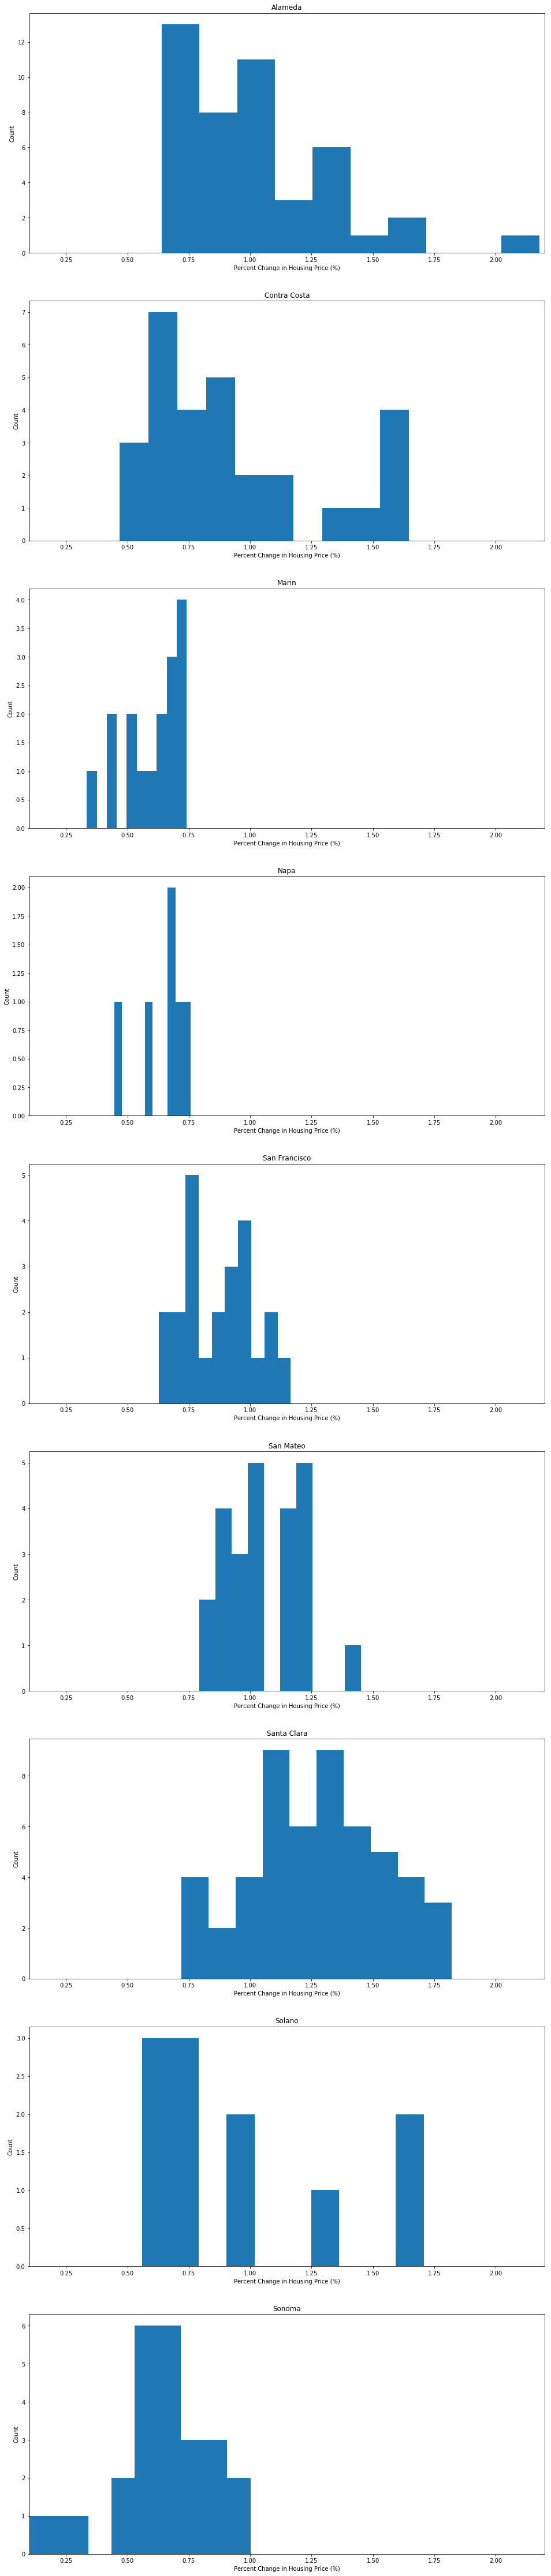

In [27]:
# Plot the distribution of percent change per county by zip code
plt.subplots(figsize = (16, 81))
for county in bayarea_counties:
    _ = plt.subplot(9, 1, bayarea_counties.index(county) + 1)
    _ = plt.hist(ba_pc_county[ba_pc_county['CountyName'] == county]['change'])
    _ = plt.title(county)
    _ = plt.xlabel('Percent Change in Housing Price (%)')
    _ = plt.ylabel('Count')
    _ = plt.xlim([0.1, 2.2])

In [28]:
# Initialize an empty data frame
ba_pc_county_ttest = {}

In [29]:
# Create for loop to calculate t-statistic and p-value between Bay Area counties
# and their mean percent change by zip code
for comb1, comb2 in combinations(bayarea_counties, 2):
    ba_pc_county_ttest[comb1, comb2] = stats.ttest_ind(ba_pc_county[ba_pc_county['CountyName'] == comb1]['change'],
                                                   ba_pc_county[ba_pc_county['CountyName'] == comb2]['change'])

# Transform data into a data frame and add if p-value is less than a 0.01 alpha
ba_pc_ttest_df = pd.DataFrame(ba_pc_county_ttest).transpose()
ba_pc_ttest_df.columns = ['stat', 'p_value']
ba_pc_ttest_df['p < alpha'] = ba_pc_ttest_df['p_value'] < 0.01
ba_pc_ttest_df

stat       p_value  p < alpha
Alameda       Contra Costa    0.994043  3.235308e-01      False
              Marin           5.089124  3.935476e-06       True
              Napa            2.859473  6.217665e-03       True
              San Francisco   2.018796  4.757432e-02      False
              San Mateo      -0.609295  5.443894e-01      False
              Santa Clara    -4.462119  2.228968e-05       True
              Solano          0.428355  6.700967e-01      False
              Sonoma          5.367954  1.039710e-06       True
Contra Costa  Marin           3.539726  9.765794e-04       True
              Napa            1.937919  6.122880e-02      False
              San Francisco   0.753516  4.546737e-01      False
              San Mateo      -1.504366  1.386554e-01      False
              Santa Clara    -4.828378  6.611053e-06       True
              Solano         -0.235280  8.152544e-01      False
              Sonoma          3.615650  6.766640e-04       True
Marin         Napa           -0.681543  5.033446e-01      False
              San Francisco  -5.963381  7.038088e-07       True
              San Mateo      -9.259675  2.768546e-11       True
              Santa Clara    -9.557278  4.500118e-14       True
              Solano         -3.407236  2.226321e-03       True
              Sonoma         -0.545658  5.884086e-01      False
Napa          San Francisco  -3.542248  1.465096e-03       True
              San Mateo      -5.730583  3.787628e-06       True
              Santa Clara    -5.614971  6.373195e-07       True
              Solano         -1.904760  7.616818e-02      False
              Sonoma          0.079725  9.370034e-01      False
San Francisco San Mateo      -3.934715  2.856285e-04       True
              Santa Clara    -6.666226  4.304836e-09       True
              Solano         -0.976245  3.362658e-01      False
              Sonoma          4.418685  5.997367e-05       True
San Mateo     Santa Clara    -3.699026  4.131996e-04       True
              Solano          0.941579  3.532502e-01      False
              Sonoma          7.598972  1.016651e-09       True
Santa Clara   Solano          3.164935  2.420332e-03       True
              Sonoma         10.315238  4.902798e-16       True
Solano        Sonoma          3.219279  2.825240e-03       True

From this analysis, the following patterns emerge.
1. Again Napa county suffers from a small sample size so being able to draw conclusive analysis becomes difficult.
2. Santa Clara county, the county with the largest percent change, has a mean percent change statistically different from all other Bay Area counties.
3. I'm able to reject the null hypothesis for the 3 counties with the smallest percent change (Napa, Marin, and Sonoma) when comparing them to the other counties. Those counties all happen to be part of the North Bay.
4. The remaining 5 counties (Alameda, Contra Costa, San Francisco, San Mateo, and Solano) aren't statistically different from each other except for San Francisco and San Mateo. San Mateo has seen the second largest percent change since 2010 while San Francisco has seen the smallest percent change of the 5 aforementioned counties.